# 27b - Scorecards statistics (For K-means cluster polygons)

This notebook calculates different statistics for __new areas of interest__ and saves the resulting csv in: 
'../../../data/external/santiago/scorecards_statistics/'

(New areas of interes were created on __Oct-Nov 2024__, during the __final adjustment stage of the project__, using K-means.)

## Import libraries

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
import sys
module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

In [2]:
all_local_dirs = 'alex'
save = True

In [3]:
if all_local_dirs == 'alex':
    aois_dir = "../../../data/external/temporal_todocker/santiago/aois/"
    data_dir = "../../../data/external/temporal_todocker/santiago/proximidad/"
    pois_dir = "../../../data/external/temporal_fromjupyter/santiago/pois/"
    ndvi_dir = "../../../data/external/temporal_todocker/santiago/ndvi_santiago/"
#elif all_local_dirs == 'edgar':
    #grl_dir = "../../../data/processed/00_pois_formated/aereal_data/"
    #count_pois_dir = grl_dir
    #ndvi_dir = grl_dir
else:
    print("WARNING: Fix all_local_dirs variable")

## Load area of interest

### K-means Zonas Análisis

In [5]:
zonas_analisis = gpd.read_file(aois_dir+'Zonas Analisis.geojson')

# Set CRS
try:
    zonas_analisis = zonas_analisis.set_crs("EPSG:4326")
except:
    zonas_analisis = zonas_analisis.to_crs("EPSG:4326")

# aois format
zonas_analisis['name'] = zonas_analisis['cluster']
zonas_analisis = zonas_analisis[['name','geometry']]

# Show
print(zonas_analisis.shape)
zonas_analisis.head(2)

(8, 2)


,name,geometry
0,6,"MULTIPOLYGON (((-70.65254 -33.44978, -70.65254..."
1,8,"MULTIPOLYGON (((-70.63163 -33.44983, -70.63163..."


<Axes: >

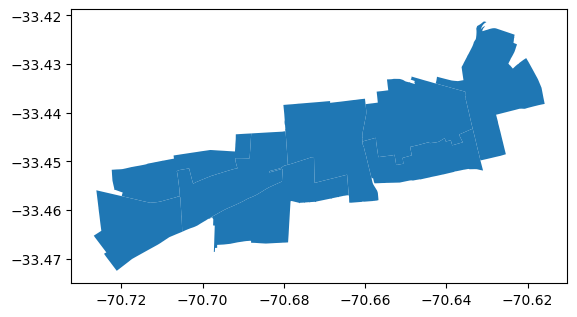

In [6]:
zonas_analisis.plot()

### Join all aois

In [7]:
all_aoi_gdfs = [zonas_analisis]
aoi_all = pd.concat(all_aoi_gdfs,
                    ignore_index = True, axis = 0)
aoi_all

,name,geometry
0,6,"MULTIPOLYGON (((-70.65254 -33.44978, -70.65254..."
1,8,"MULTIPOLYGON (((-70.63163 -33.44983, -70.63163..."
2,5,"MULTIPOLYGON (((-70.67243 -33.45408, -70.67243..."
3,7,"MULTIPOLYGON (((-70.65506 -33.45447, -70.65550..."
4,4,"MULTIPOLYGON (((-70.68820 -33.46635, -70.68835..."
5,3,"MULTIPOLYGON (((-70.70591 -33.45449, -70.70590..."
6,2,"MULTIPOLYGON (((-70.70123 -33.46318, -70.70149..."
7,1,"MULTIPOLYGON (((-70.71713 -33.46996, -70.71725..."


In [8]:
if save:
    aoi_all.to_file('../../../data/external/santiago/scorecards_statistics/scorecards_2_aois.gpkg')

## __Statistics for each area of interest's scorecard__

In [9]:
##############################
# POBLACIÓN, ÁREA Y DENSIDAD

# [DONE] Población total 
# -----> Fuente original: SIG/Info_Sociodemografica/zonas_censales_hogares_RM.shp
# -----> Reproyectado y renombrado a sociodemografico_zonas_censales_32719
# -----> Metodología: Repartir columnas ['persons'] por clipped area (Weighted)

# [DONE] Área (ha)
# -----> Geometría

# [DONE] Densidad de población (pob/ha)
# -----> [Población total / Área (ha)]

##############################
# ÁREAS Y PORCENTAJES DE CONSTRUCCIÓN
# -----> Fuente original: SIG/Medio_Urbano_Rural/Uso_Suelo/usos_de_suelo_mnz.shp
# -----> Datos repartidos a nodos utilizando Voronoi. Capa reproyectada y renombrada: usos_de_suelo.gpkg

# [DONE] Área total de construcción (m2)
# -----> Metodología: Clip nodos por área de interés y suma de todas las áreas/usos.

# [DONE] Uso Habitacional(%)
# -----> Metodología: Clip nodos por área de interés y suma de la columna ['HABIT'] dividida entre área total calculada anteriormente.

# [DONE] Uso Equipamiento (%)
# -----> Metodología: Clip nodos por área de interés y suma de las columnas ['CULT','DEPOR','EDUC','SALUD'] dividida entre área total calculada anteriormente.

# [DONE] Uso Comercio (%)
# -----> Metodología: Clip nodos por área de interés y suma de la columna ['COM'] dividida entre área total calculada anteriormente.

# [DONE] Uso Servicios (%)
# -----> Metodología: Clip nodos por área de interés y suma de las columnas ['ADMIN','HOTEL','MIN','OFIC'] dividida entre área total calculada anteriormente.

# [DONE] Uso Industria (%)
# -----> Metodología: Clip nodos por área de interés y suma de la columna ['INDUS'] dividida entre área total calculada anteriormente.

# [DONE] Uso Otros (%)
# -----> Metodología: Clip nodos por área de interés y suma de las columnas ['AGR','BBCC','BODEG','ERIAZO','ESTAC','OTROS','TPTE'] dividida entre área total calculada anteriormente.

##############################
# VIVIENDAS, TIPOS DE VIVIENDAS Y PERSONAS POR VIVIENDA
# -----> Fuente original: SIG/Info_Sociodemografica/viviendas_por_tipo_mnz.shp
# -----> Datos repartidos a nodos utilizando Voronoi. Capa reproyectada y renombrada: casas_deptos_mzn.gpkg

# [DONE] Total de viviendas
# -----> Metodología: Clip nodos por área de interés y suma de la columna ['total_viv']

# [DONE] Casas(%)
# -----> Metodología: Clip nodos por área de interés y suma de la columna ['casas'] dividida entre el total_viv calculado anteriormente.

# [DONE] Departamentos (%)
# -----> Metodología: Clip nodos por área de interés y suma de la columna ['deptos'] dividida entre el total_viv calculado anteriormente.

# [DONE] Personas por vivienda
# -----> Metodología: Clip nodos por área de interés y división de [Población total (Calculada anteriormente)] / [suma de la columna ['viv_ocupa'] (Total de viv ocupadas)].

##############################
# VIVIENDAS SOCIALES (TOTALES Y %)
# -----> Fuente original: SIG/Medio_Urbano_Rural/Catastro Nacional de Viviendas Sociales 2022/CECYT_CVS_2020.shp
# -----> Datos repartidos a nodos utilizando Voronoi. Capa reproyectada y renombrada: viv_social.gpkg

# [DONE] Viviendas sociales
# -----> Metodología: Clip nodos por área de interés y suma de la columna ['Housing'] (Originalmente ['Total_de_v']

# [DONE] Vivienda social (%)
# -----> Metodología: División de [Suma de viviendas sociales (calculado previamente)] entre [Suma nodos de viviendas totales (calculado previamente)]

##############################
# OFICINAS
# -----> Fuente original: SIG/Medio_Urbano_Rural/oficinas_mnz/shape-manzanas_oficinas.shp
# -----> Datos repartidos a nodos utilizando Voronoi. Capa reproyectada y renombrada: oficinas.gpkg

# [DONE] Total de oficinas
# -----> Metodología: Clip nodos por área de interés y suma de la columna ['Oficinas']

##############################
# NDVI
# -----> Fuente original: Santiago_ndvi_HexRes10_v0.geojson

# [DONE] NDVI
# -----> Metodología: avg de ndvi_mean x 100 (Mejora readability) [No considera el área clippeada, considera todos los hexs res 10 que se hayan clippeado]

##############################
# NIVELES SOCIOECONÓMICOS
# -----> Fuente original: SIG/Info_Sociodemografica/Datos_socioeconomicos/BAS_ismt_urbano_2022.shp
# -----> Reproyectado y renombrado a bas_ismt_urbano_2022_32719

# [DONE] Nivel socioeconómico
# -----> Metodología: Clip al área de interés y suma de cada nivel socioeconómico considerando el área clippeada [Weighted]

In [10]:
# Create data_gdf (Will store data for each area of interest)
data_gdf = aoi_all.copy()
data_gdf.set_index('name',inplace=True)

# Area of each aoi
data_gdf = data_gdf.to_crs("EPSG:32719")
data_gdf['area(ha)'] = data_gdf.area/10000
data_gdf = data_gdf.to_crs("EPSG:4326")

# Show
print(data_gdf.shape)
data_gdf.head(1)

(8, 2)


,geometry,area(ha)
name,,
6,"MULTIPOLYGON (((-70.65254 -33.44978, -70.65254...",325.829708


### __Población total y densidad de población (pob/ha)__

In [11]:
# Load data
sociodemografico_zonas_censales = gpd.read_file(data_dir + 'sociodemografico_zonas_censales_32719.gpkg')

# Set CRS
try:
    sociodemografico_zonas_censales = sociodemografico_zonas_censales.set_crs("EPSG:4326")
except:
    sociodemografico_zonas_censales = sociodemografico_zonas_censales.to_crs("EPSG:4326")

# Show
print(sociodemografico_zonas_censales.shape)
sociodemografico_zonas_censales.head(1)

(2376, 36)


,GEOCODI,REGION,NOM_REG,PROVINC,NOM_PRO,COMUNA,NOM_COM,DISTRIT,LOC_ZON,NOM_LOC,...,ACTIV_N_A,ACTIV_N_B,area_ha,Dns_prs,prc_hg_,prc_cn_,prc_dmy,pr_JHES,prc_OcA,geometry
0,13101011001,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13101,SANTIAGO,1,1,None,...,978.0,407.0,20.91,103.969393,0.76376,0.107536,0.133785,0.799323,0.828112,"MULTIPOLYGON (((-70.63925 -33.43663, -70.63932..."


In [12]:
# Set current data of interest
data_of_interest = sociodemografico_zonas_censales.copy()

# Find area of existing polygons (Used for representative data extraction)
data_of_interest = data_of_interest.to_crs("EPSG:32719")
data_of_interest['area'] = data_of_interest.area
data_of_interest = data_of_interest.to_crs("EPSG:4326")

# Data extraction by area of interest
for aoi_name in list(aoi_all.name.unique()):

    # Extract area of interest geometry
    aoi = aoi_all.loc[aoi_all.name==aoi_name].copy()

    # Clip data for area of interest
    data_of_interest_aoi = gpd.clip(data_of_interest, aoi)

    # Find percentage of geometry that fell inside clipped area
    data_of_interest_aoi = data_of_interest_aoi.to_crs("EPSG:32719")
    data_of_interest_aoi['clipped_area'] = data_of_interest_aoi.area
    data_of_interest_aoi = data_of_interest_aoi.to_crs("EPSG:4326")

    data_of_interest_aoi['pct_inside'] = data_of_interest_aoi['clipped_area']/data_of_interest_aoi['area']

    # -----------------------------------------------------------------------------------------
    # Register data - Población total
    data_of_interest_aoi['persons_inside'] = data_of_interest_aoi['persons'] * data_of_interest_aoi['pct_inside']
    data_gdf.loc[aoi_name,'Población total'] = data_of_interest_aoi['persons_inside'].sum()

# Densidad de población (hab/ha)
data_gdf['Densidad de población (hab/ha)'] = data_gdf['Población total'] / data_gdf['area(ha)']

data_gdf.head(1)

,geometry,area(ha),Población total,Densidad de población (hab/ha)
name,,,,
6,"MULTIPOLYGON (((-70.65254 -33.44978, -70.65254...",325.829708,74162.998957,227.61276


### __Usos, espacio construido__

In [13]:
# Load data
usos_construidos = gpd.read_file(pois_dir + 'usos_de_suelo.gpkg')

# Set CRS
try:
    usos_construidos = usos_construidos.set_crs("EPSG:4326")
except:
    usos_construidos = usos_construidos.to_crs("EPSG:4326")

# Show
print(usos_construidos.shape)
usos_construidos.head(1)

(229965, 20)


,osmid,ADMIN,AGR,BBCC,BODEG,COM,CULT,DEPOR,EDUC,ERIAZO,ESTAC,HABIT,HOTEL,INDUS,MIN,OFIC,OTROS,SALUD,TPTE,geometry
0,386139,0.0,0.0,0.520425,163.909199,769.964416,27.715437,0.0,13.781373,0.0,0.0,203.073595,14.213205,0.107459,0.0,887.353986,30.780062,0.199923,0.0,POINT (-70.64725 -33.44313)


In [14]:
# Set current data of interest
data_of_interest = usos_construidos.copy()

# Data extraction by area of interest
for aoi_name in list(aoi_all.name.unique()):
    
    # Extract area of interest geometry
    aoi = aoi_all.loc[aoi_all.name==aoi_name].copy()
    
    # Clip data for area of interest
    data_of_interest_aoi = gpd.clip(data_of_interest, aoi)
    
    # -----------------------------------------------------------------------------------------
    # ALL BUILT AREA
    
    # Find sum of all built area by node
    all_uses = ['ADMIN','AGR','BBCC','BODEG','COM','CULT','DEPOR','EDUC','ERIAZO','ESTAC','HABIT','HOTEL','INDUS','MIN','OFIC','OTROS','SALUD','TPTE']
    data_of_interest_aoi['tot_area'] = data_of_interest_aoi[all_uses].sum(axis=1)
    
    # All built area
    area_total = data_of_interest_aoi['tot_area'].sum()
    
    # -----------------------------------------------------------------------------------------
    # REGISTER DATA
    
    # Register data - Uso Habitacional (%)
    area_habitacional = data_of_interest_aoi['HABIT'].sum()
    data_gdf.loc[aoi_name,'Uso Habitacional (%)'] = area_habitacional / area_total
    
    # Register data - Uso Equipamiento (%)
    area_equipamiento = (data_of_interest_aoi['CULT'].sum() +
                         data_of_interest_aoi['DEPOR'].sum() + 
                         data_of_interest_aoi['EDUC'].sum() + 
                         data_of_interest_aoi['SALUD'].sum())
    data_gdf.loc[aoi_name,'Uso Equipamiento (%)'] = area_equipamiento / area_total
    
    # Register data - Uso Comercio (%)
    area_comercio = data_of_interest_aoi['COM'].sum()
    data_gdf.loc[aoi_name,'Uso Comercio (%)'] = area_comercio / area_total
    
    # Register data - Uso Servicios (%)
    area_servicios = (data_of_interest_aoi['ADMIN'].sum() +
                      data_of_interest_aoi['HOTEL'].sum() +
                      data_of_interest_aoi['MIN'].sum() +
                      data_of_interest_aoi['OFIC'].sum())
    data_gdf.loc[aoi_name,'Uso Servicios (%)'] = area_servicios / area_total
    
    # Register data - Uso Industria (%)
    area_industria = (data_of_interest_aoi['INDUS'].sum())
    data_gdf.loc[aoi_name,'Uso Industria (%)'] = area_industria / area_total
    
    # Register data - Uso Otros (%)
    area_otros = (data_of_interest_aoi['AGR'].sum() +
                  data_of_interest_aoi['BBCC'].sum() +
                  data_of_interest_aoi['BODEG'].sum() +
                  data_of_interest_aoi['ERIAZO'].sum() +
                  data_of_interest_aoi['ESTAC'].sum() +
                  data_of_interest_aoi['OTROS'].sum() +
                  data_of_interest_aoi['TPTE'].sum())
    data_gdf.loc[aoi_name,'Uso Otros (%)'] =  area_otros / area_total
    
    # Register data - Área total de construcción (m2)
    data_gdf.loc[aoi_name,'Área total de construcción (m2)'] = area_total

# Show
data_gdf.head(1)

/opt/conda/envs/gds/lib/python3.9/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/conda/envs/gds/lib/python3.9/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/conda/envs/gds/lib/python3.9/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,geometry,area(ha),Población total,Densidad de población (hab/ha),Uso Habitacional (%),Uso Equipamiento (%),Uso Comercio (%),Uso Servicios (%),Uso Industria (%),Uso Otros (%),Área total de construcción (m2)
name,,,,,,,,,,,
6,"MULTIPOLYGON (((-70.65254 -33.44978, -70.65254...",325.829708,74162.998957,227.61276,0.254357,0.050851,0.157112,0.347591,0.00243,0.187658,9.216631e+06


### __Total de viviendas, casas(%), departamentos (%) y Personas por vivienda__

In [15]:
# Load data
casas_deptos_mzn = gpd.read_file(pois_dir + 'casas_deptos_mzn.gpkg')

# Set CRS
try:
    casas_deptos_mzn = casas_deptos_mzn.set_crs("EPSG:4326")
except:
    casas_deptos_mzn = casas_deptos_mzn.to_crs("EPSG:4326")

# Show
print(casas_deptos_mzn.shape)
casas_deptos_mzn.head(1)

(214430, 7)


,osmid,total_viv,viv_ocupa,casas,deptos,otros,geometry
0,14609420,20.126666,18.528881,10.392544,9.664592,0.069529,POINT (-70.75478 -33.51598)


In [16]:
# Set current data of interest
data_of_interest = casas_deptos_mzn.copy()

# Data extraction by area of interest
for aoi_name in list(aoi_all.name.unique()):
    
    # Extract area of interest geometry
    aoi = aoi_all.loc[aoi_all.name==aoi_name].copy()
    
    # Clip data for area of interest
    data_of_interest_aoi = gpd.clip(data_of_interest, aoi)
    
    # -----------------------------------------------------------------------------------------
    # REGISTER DATA

    # Total de viviendas
    total_viv = data_of_interest_aoi['total_viv'].sum()
    data_gdf.loc[aoi_name,'Total de viviendas'] = total_viv

    # % Casas
    data_gdf.loc[aoi_name,'Casas(%)'] = data_of_interest_aoi['casas'].sum() / total_viv

    # % Casas
    data_gdf.loc[aoi_name,'Departamentos(%)'] = data_of_interest_aoi['deptos'].sum() / total_viv

    # Viviendas ocupadas (Para personas por vivienda)
    data_gdf.loc[aoi_name,'viv_ocupa'] = data_of_interest_aoi['viv_ocupa'].sum()
    
# Personas por vivienda
data_gdf['Personas por vivienda'] = data_gdf['Población total']/data_gdf['viv_ocupa']
data_gdf.drop(columns=['viv_ocupa'],inplace=True)

# Show
data_gdf.head(1)

,geometry,area(ha),Población total,Densidad de población (hab/ha),Uso Habitacional (%),Uso Equipamiento (%),Uso Comercio (%),Uso Servicios (%),Uso Industria (%),Uso Otros (%),Área total de construcción (m2),Total de viviendas,Casas(%),Departamentos(%),Personas por vivienda
name,,,,,,,,,,,,,,,
6,"MULTIPOLYGON (((-70.65254 -33.44978, -70.65254...",325.829708,74162.998957,227.61276,0.254357,0.050851,0.157112,0.347591,0.00243,0.187658,9.216631e+06,44362.785095,0.029642,0.964588,2.085451


### __Viviendas sociales y Vivienda social (%)__

In [17]:
# Load data
viviendas_sociales = gpd.read_file(pois_dir + 'viv_social.gpkg')

# Set CRS
try:
    viviendas_sociales = viviendas_sociales.set_crs("EPSG:4326")
except:
    viviendas_sociales = viviendas_sociales.to_crs("EPSG:4326")

# Show
print(viviendas_sociales.shape)
viviendas_sociales.head(1)

(34639, 3)


,osmid,housing,geometry
0,14528355,0.662426,POINT (-70.69014 -33.45685)


In [18]:
# Set current data of interest
data_of_interest = viviendas_sociales.copy()

# Data extraction by area of interest
for aoi_name in list(aoi_all.name.unique()):
    
    # Extract area of interest geometry
    aoi = aoi_all.loc[aoi_all.name==aoi_name].copy()
    
    # Clip data for area of interest
    data_of_interest_aoi = gpd.clip(data_of_interest, aoi)
    
    # -----------------------------------------------------------------------------------------
    # REGISTER DATA

    # Total de viviendas sociales
    total_viv_soc = data_of_interest_aoi['housing'].sum()
    data_gdf.loc[aoi_name,'Viviendas sociales'] = total_viv_soc

# Vivienda social (%)
data_gdf['Vivienda social (%)'] = data_gdf['Viviendas sociales'] / data_gdf['Total de viviendas']

data_gdf.head(1)

,geometry,area(ha),Población total,Densidad de población (hab/ha),Uso Habitacional (%),Uso Equipamiento (%),Uso Comercio (%),Uso Servicios (%),Uso Industria (%),Uso Otros (%),Área total de construcción (m2),Total de viviendas,Casas(%),Departamentos(%),Personas por vivienda,Viviendas sociales,Vivienda social (%)
name,,,,,,,,,,,,,,,,,
6,"MULTIPOLYGON (((-70.65254 -33.44978, -70.65254...",325.829708,74162.998957,227.61276,0.254357,0.050851,0.157112,0.347591,0.00243,0.187658,9.216631e+06,44362.785095,0.029642,0.964588,2.085451,0.0,0.0


### __Oficinas__

In [19]:
# Load data
oficinas = gpd.read_file(pois_dir + 'oficinas.gpkg')

# Set CRS
try:
    oficinas = oficinas.set_crs("EPSG:4326")
except:
    oficinas = oficinas.to_crs("EPSG:4326")

# Show
print(oficinas.shape)
oficinas.head(1)

(229965, 3)


,osmid,Oficinas,geometry
0,386139,12.820194,POINT (-70.64725 -33.44313)


In [20]:
# Set current data of interest
data_of_interest = oficinas.copy()

# Data extraction by area of interest
for aoi_name in list(aoi_all.name.unique()):
    
    # Extract area of interest geometry
    aoi = aoi_all.loc[aoi_all.name==aoi_name].copy()
    
    # Clip data for area of interest
    data_of_interest_aoi = gpd.clip(data_of_interest, aoi)
    
    # -----------------------------------------------------------------------------------------
    # REGISTER DATA

    # Total de oficinas
    total_oficinas = data_of_interest_aoi['Oficinas'].sum()
    data_gdf.loc[aoi_name,'Total de oficinas'] = total_oficinas

data_gdf.head(1)

,geometry,area(ha),Población total,Densidad de población (hab/ha),Uso Habitacional (%),Uso Equipamiento (%),Uso Comercio (%),Uso Servicios (%),Uso Industria (%),Uso Otros (%),Área total de construcción (m2),Total de viviendas,Casas(%),Departamentos(%),Personas por vivienda,Viviendas sociales,Vivienda social (%),Total de oficinas
name,,,,,,,,,,,,,,,,,,
6,"MULTIPOLYGON (((-70.65254 -33.44978, -70.65254...",325.829708,74162.998957,227.61276,0.254357,0.050851,0.157112,0.347591,0.00243,0.187658,9.216631e+06,44362.785095,0.029642,0.964588,2.085451,0.0,0.0,14770.731409


### __NDVI__

In [21]:
# Load data
ndvi_gdf = gpd.read_file(ndvi_dir + f'Santiago_ndvi_HexRes10_v0.geojson')
ndvi_gdf = ndvi_gdf[['ndvi_mean','geometry']]

# Show
print(ndvi_gdf.shape)
ndvi_gdf.head(1)

(64190, 2)


,ndvi_mean,geometry
0,0.135445,"POLYGON ((-70.67723 -33.43729, -70.67786 -33.4..."


In [22]:
# Set current data of interest
data_of_interest = ndvi_gdf.copy()

# Data extraction by area of interest
for aoi_name in list(aoi_all.name.unique()):

    # Extract area of interest geometry
    aoi = aoi_all.loc[aoi_all.name==aoi_name].copy()

    # Clip data for area of interest
    data_of_interest_aoi = gpd.clip(data_of_interest, aoi)

    # -----------------------------------------------------------------------------------------
    # Register data
    # NDVI (Multiplied by 100 to improve readability)
    data_gdf.loc[aoi_name,'NDVI'] = (data_of_interest_aoi['ndvi_mean'].mean())*100

data_gdf.head(1)

,geometry,area(ha),Población total,Densidad de población (hab/ha),Uso Habitacional (%),Uso Equipamiento (%),Uso Comercio (%),Uso Servicios (%),Uso Industria (%),Uso Otros (%),Área total de construcción (m2),Total de viviendas,Casas(%),Departamentos(%),Personas por vivienda,Viviendas sociales,Vivienda social (%),Total de oficinas,NDVI
name,,,,,,,,,,,,,,,,,,,
6,"MULTIPOLYGON (((-70.65254 -33.44978, -70.65254...",325.829708,74162.998957,227.61276,0.254357,0.050851,0.157112,0.347591,0.00243,0.187658,9.216631e+06,44362.785095,0.029642,0.964588,2.085451,0.0,0.0,14770.731409,11.909423


### __Nivel socioeconómico__

In [23]:
# Load data
socioeconomico_urbano = gpd.read_file(data_dir + 'bas_ismt_urbano_2022_32719.gpkg')

# Set CRS
try:
    socioeconomico_urbano = socioeconomico_urbano.set_crs("EPSG:4326")
except:
    socioeconomico_urbano = socioeconomico_urbano.to_crs("EPSG:4326")
    
# Show
print(socioeconomico_urbano.shape)
socioeconomico_urbano.head(1)

(1863, 46)


,objectid,cod_region,nom_region,cod_provin,nom_provin,cod_comuna,nom_comuna,geocodigo,urbano,distrito,...,alleg,escolar,mat_acept,mat_recup,mat_irrec,ind_mat,poblacion,st_area_sh,st_length_,geometry
0,1,13,Metropolitana de Santiago,131,Santiago,13101,Santiago,13101011001,SANTIAGO,1,...,196.0,15.93956,1091.0,1.0,0.0,8.999084,2174,209145.642793,2200.895816,"MULTIPOLYGON (((-70.64101 -33.43757, -70.64103..."


In [29]:
# Read all areas of interest (Polygon cluster codes)
areas_of_interest = list(aoi_all.name.unique())

# Set current data of interest
data_of_interest = socioeconomico_urbano.copy()

# Read the data categories
niveles_socioeconomicos = ['ab','c1','c2','c3','d','e']

# Find area of existing polygons (Used for deciding if inside or not)
data_of_interest = data_of_interest.to_crs("EPSG:32719")
data_of_interest['area'] = data_of_interest.area
data_of_interest = data_of_interest.to_crs("EPSG:4326")

# Data extraction by area of interest
for aoi_name in areas_of_interest:

    # Extract area of interest geometry
    aoi = aoi_all.loc[aoi_all.name==aoi_name].copy()

    # Clip data for area of interest
    data_of_interest_aoi = gpd.clip(data_of_interest, aoi)

    # Find percentage of geometry that fell inside clipped area
    data_of_interest_aoi = data_of_interest_aoi.to_crs("EPSG:32719")
    data_of_interest_aoi['clipped_area'] = data_of_interest_aoi.area
    data_of_interest_aoi = data_of_interest_aoi.to_crs("EPSG:4326")
    data_of_interest_aoi['pct_inside'] = data_of_interest_aoi['clipped_area']/data_of_interest_aoi['area']

    # Keep only if pct_inside is greater than 50%.
    clipped_data_of_interest_aoi = data_of_interest_aoi.loc[data_of_interest_aoi.pct_inside >= 0.5]

    # Register data for each n_socio in current area of interest
    for n_socio in niveles_socioeconomicos:
        data_gdf.loc[aoi_name,n_socio] = clipped_data_of_interest_aoi[n_socio].sum()

data_gdf.head(1)

,geometry,area(ha),Población total,Densidad de población (hab/ha),Uso Habitacional (%),Uso Equipamiento (%),Uso Comercio (%),Uso Servicios (%),Uso Industria (%),Uso Otros (%),...,Viviendas sociales,Vivienda social (%),Total de oficinas,NDVI,ab,c1,c2,c3,d,e
name,,,,,,,,,,,,,,,,,,,,,
6,"MULTIPOLYGON (((-70.65254 -33.44978, -70.65254...",325.829708,74162.998957,227.61276,0.254357,0.050851,0.157112,0.347591,0.00243,0.187658,...,0.0,0.0,14770.731409,11.909423,2935.0,13203.0,9122.0,6307.0,2472.0,404.0


In [32]:
# Save gdf
save_gdf = data_gdf.reset_index()
save_gdf.rename(columns={'name':'cluster'},inplace=True)

# Show
save_gdf

,cluster,geometry,area(ha),Población total,Densidad de población (hab/ha),Uso Habitacional (%),Uso Equipamiento (%),Uso Comercio (%),Uso Servicios (%),Uso Industria (%),...,Viviendas sociales,Vivienda social (%),Total de oficinas,NDVI,ab,c1,c2,c3,d,e
0,6,"MULTIPOLYGON (((-70.65254 -33.44978, -70.65254...",325.829708,74162.998957,227.612760,0.254357,0.050851,0.157112,0.347591,0.002430,...,0.000000,0.000000,14770.731409,11.909423,2935.0,13203.0,9122.0,6307.0,2472.0,404.0
1,8,"MULTIPOLYGON (((-70.63163 -33.44983, -70.63163...",332.753501,25410.000515,76.362834,0.371247,0.160095,0.092320,0.169762,0.010304,...,0.000000,0.000000,2323.781216,18.604072,1497.0,4231.0,2392.0,1357.0,751.0,108.0
2,5,"MULTIPOLYGON (((-70.67243 -33.45408, -70.67243...",326.602386,57662.998165,176.554124,0.457699,0.165827,0.100919,0.095595,0.014147,...,0.000000,0.000000,1054.892383,11.689160,1482.0,6634.0,5494.0,4397.0,4369.0,618.0
3,7,"MULTIPOLYGON (((-70.65506 -33.45447, -70.65550...",184.315732,85308.004201,462.836261,0.601176,0.056168,0.076898,0.049908,0.013889,...,0.000000,0.000000,652.692804,10.275932,2849.0,16301.0,11096.0,6220.0,2619.0,330.0
4,4,"MULTIPOLYGON (((-70.68820 -33.46635, -70.68835...",278.006850,24097.000715,86.677723,0.289215,0.038585,0.223221,0.074032,0.078671,...,715.488327,0.084823,615.024887,9.990278,211.0,968.0,1121.0,1826.0,3047.0,502.0
5,3,"MULTIPOLYGON (((-70.70591 -33.45449, -70.70590...",205.310363,27349.999652,133.212952,0.784846,0.033450,0.032409,0.013821,0.037114,...,1516.099195,0.161391,126.503734,12.914077,117.0,801.0,1315.0,2413.0,3255.0,675.0
6,2,"MULTIPOLYGON (((-70.70123 -33.46318, -70.70149...",263.006899,34538.999353,131.323549,0.519423,0.134305,0.096734,0.037383,0.032598,...,103.062695,0.005432,213.841524,13.197892,272.0,2373.0,3296.0,3622.0,2758.0,441.0
7,1,"MULTIPOLYGON (((-70.71713 -33.46996, -70.71725...",231.081626,18806.000179,81.382499,0.634237,0.047011,0.035186,0.051169,0.104363,...,1485.924946,0.233812,92.116431,17.879663,191.0,1159.0,1392.0,1722.0,1219.0,209.0


In [33]:
if save:
    data_gdf.to_csv('../../../data/external/santiago/scorecards_statistics/scorecards_2_statistics.csv')

# OLD CODE

In [28]:
old = """
# Set current data of interest
data_of_interest = usos_construidos.copy()

# Data extraction by area of interest
for aoi_name in list(aoi_all.name.unique()):

    # Extract area of interest geometry
    aoi = aoi_all.loc[aoi_all.name==aoi_name].copy()

    # Clip data for area of interest
    data_of_interest_aoi = gpd.clip(data_of_interest, aoi)

    # Find percentage of geometry that fell inside clipped area
    data_of_interest_aoi = data_of_interest_aoi.to_crs("EPSG:32719")
    data_of_interest_aoi['clipped_area'] = data_of_interest_aoi.area
    data_of_interest_aoi = data_of_interest_aoi.to_crs("EPSG:4326")

    data_of_interest_aoi['pct_inside'] = data_of_interest_aoi['clipped_area']/data_of_interest_aoi['area']

    # -----------------------------------------------------------------------------------------
    # Prepare data - All built uses
    all_uses = ['ADMIN','AGR','BBCC','BODEG','COM','CULT','DEPOR','EDUC','ERIAZO',
                'ESTAC','HABIT','HOTEL','INDUS','MIN','OFIC','OTROS','SALUD','TPTE']

    # Prepare data - clip built construction areas according to pct of block that falls inside aoi
    clipped_uses = []
    for use in all_uses:
        data_of_interest_aoi[f'{use}_inside'] = data_of_interest_aoi[use] * data_of_interest_aoi['pct_inside']
        clipped_uses.append(f'{use}_inside')

    # Find sum of all built area by block
    data_of_interest_aoi['tot_area'] = data_of_interest_aoi[clipped_uses].sum(axis=1)

    # -----------------------------------------------------------------------------------------
    # Register data - Uso Habitacional (%)
    area_habitacional = data_of_interest_aoi['HABIT_inside'].sum()
    data_gdf.loc[aoi_name,'Uso Habitacional (%)'] = area_habitacional / data_of_interest_aoi['tot_area'].sum()
    
    # Register data - Uso Equipamiento (%)
    area_equipamiento = (data_of_interest_aoi['CULT_inside'].sum() +
                         data_of_interest_aoi['DEPOR_inside'].sum() + 
                         data_of_interest_aoi['EDUC_inside'].sum() + 
                         data_of_interest_aoi['SALUD_inside'].sum())
    data_gdf.loc[aoi_name,'Uso Equipamiento (%)'] = area_equipamiento / data_of_interest_aoi['tot_area'].sum()
    
    # Register data - Uso Comercio (%)
    area_comercio = data_of_interest_aoi['COM_inside'].sum()
    data_gdf.loc[aoi_name,'Uso Comercio (%)'] = area_comercio / data_of_interest_aoi['tot_area'].sum()
    
    # Register data - Uso Servicios (%)
    area_servicios = (data_of_interest_aoi['ADMIN_inside'].sum() +
                      data_of_interest_aoi['HOTEL_inside'].sum() +
                      data_of_interest_aoi['MIN_inside'].sum() +
                      data_of_interest_aoi['OFIC_inside'].sum())
    data_gdf.loc[aoi_name,'Uso Servicios (%)'] = area_servicios / data_of_interest_aoi['tot_area'].sum()
    
    # Register data - Uso Industria (%)
    area_industria = (data_of_interest_aoi['INDUS_inside'].sum())
    data_gdf.loc[aoi_name,'Uso Industria (%)'] = area_industria / data_of_interest_aoi['tot_area'].sum()
    
    # Register data - Uso Otros (%)
    area_otros = (data_of_interest_aoi['AGR_inside'].sum() +
                  data_of_interest_aoi['BBCC_inside'].sum() +
                  data_of_interest_aoi['BODEG_inside'].sum() +
                  data_of_interest_aoi['ERIAZO_inside'].sum() +
                  data_of_interest_aoi['ESTAC_inside'].sum() +
                  data_of_interest_aoi['OTROS_inside'].sum() +
                  data_of_interest_aoi['TPTE_inside'].sum())
    data_gdf.loc[aoi_name,'Uso Otros (%)'] =  area_otros / data_of_interest_aoi['tot_area'].sum()

    # Register data - Área total de construcción (m2)
    data_gdf.loc[aoi_name,'Área total de construcción (m2)'] = area_habitacional + area_equipamiento + area_comercio + area_servicios + area_industria + area_otros

# Checking if all uses sum 100%
data_gdf['Uso_sum'] = (data_gdf['Uso Habitacional (%)']+data_gdf['Uso Equipamiento (%)']+data_gdf['Uso Comercio (%)']+data_gdf['Uso Servicios (%)']
+data_gdf['Uso Industria (%)']+data_gdf['Uso Otros (%)'])

# Show
data_gdf """

In [29]:
old = """
# Set current data of interest
data_of_interest = casas_deptos_mzn.copy()

# Find area of existing polygons (Used for representative data extraction)
data_of_interest = data_of_interest.to_crs("EPSG:32719")
data_of_interest['area'] = data_of_interest.area
data_of_interest = data_of_interest.to_crs("EPSG:4326")

# Data extraction by area of interest
for aoi_name in list(aoi_all.name.unique()):

    # Extract area of interest geometry
    aoi = aoi_all.loc[aoi_all.name==aoi_name].copy()

    # Clip data for area of interest
    data_of_interest_aoi = gpd.clip(data_of_interest, aoi)

    # Find percentage of geometry that fell inside clipped area
    data_of_interest_aoi = data_of_interest_aoi.to_crs("EPSG:32719")
    data_of_interest_aoi['clipped_area'] = data_of_interest_aoi.area
    data_of_interest_aoi = data_of_interest_aoi.to_crs("EPSG:4326")

    data_of_interest_aoi['pct_inside'] = data_of_interest_aoi['clipped_area']/data_of_interest_aoi['area']

    # -----------------------------------------------------------------------------------------
    # Register data
    # Total de viviendas
    data_of_interest_aoi['total_viv_inside'] = data_of_interest_aoi['total_viv'] * data_of_interest_aoi['pct_inside']
    total_viv_inside = data_of_interest_aoi['total_viv_inside'].sum()
    data_gdf.loc[aoi_name,'Total de viviendas'] = total_viv_inside

    # % Casas
    data_of_interest_aoi['casas_inside'] = data_of_interest_aoi['casas'] * data_of_interest_aoi['pct_inside']
    data_gdf.loc[aoi_name,'Casas(%)'] = data_of_interest_aoi['casas_inside'].sum() / total_viv_inside

    # % Departamentos
    data_of_interest_aoi['deptos_inside'] = data_of_interest_aoi['deptos'] * data_of_interest_aoi['pct_inside']
    data_gdf.loc[aoi_name,'Departamentos(%)'] = data_of_interest_aoi['deptos_inside'].sum() / total_viv_inside

# Personas por vivienda
data_gdf['Personas por vivienda'] = data_gdf['Población total']/data_gdf['Total de viviendas']

data_gdf"""

In [30]:
old = """
# Set current data of interest
data_of_interest = viviendas_sociales.copy()

# Find area of existing polygons (Used for representative data extraction)
data_of_interest = data_of_interest.to_crs("EPSG:32719")
data_of_interest['area'] = data_of_interest.area
data_of_interest = data_of_interest.to_crs("EPSG:4326")

# Data extraction by area of interest
for aoi_name in list(aoi_all.name.unique()):

    # Extract area of interest geometry
    aoi = aoi_all.loc[aoi_all.name==aoi_name].copy()

    # Clip data for area of interest
    data_of_interest_aoi = gpd.clip(data_of_interest, aoi)

    # Find percentage of geometry that fell inside clipped area
    data_of_interest_aoi = data_of_interest_aoi.to_crs("EPSG:32719")
    data_of_interest_aoi['clipped_area'] = data_of_interest_aoi.area
    data_of_interest_aoi = data_of_interest_aoi.to_crs("EPSG:4326")

    data_of_interest_aoi['pct_inside'] = data_of_interest_aoi['clipped_area']/data_of_interest_aoi['area']

    # -----------------------------------------------------------------------------------------
    # Register data
    # Viviendas sociales
    data_of_interest_aoi['Total_de_v_inside'] = data_of_interest_aoi['Total_de_v'] * data_of_interest_aoi['pct_inside']
    data_gdf.loc[aoi_name,'Viviendas sociales'] = data_of_interest_aoi['Total_de_v_inside'].sum()


# Vivienda social (%)
data_gdf['Vivienda social (%)'] = data_gdf['Viviendas sociales']/data_gdf['Total de viviendas']

data_gdf"""

In [31]:
old = """
# Set current data of interest
data_of_interest = oficinas.copy()

# Find area of existing polygons (Used for representative data extraction)
data_of_interest = data_of_interest.to_crs("EPSG:32719")
data_of_interest['area'] = data_of_interest.area
data_of_interest = data_of_interest.to_crs("EPSG:4326")

# Data extraction by area of interest
for aoi_name in list(aoi_all.name.unique()):

    # Extract area of interest geometry
    aoi = aoi_all.loc[aoi_all.name==aoi_name].copy()

    # Clip data for area of interest
    data_of_interest_aoi = gpd.clip(data_of_interest, aoi)

    # Find percentage of geometry that fell inside clipped area
    data_of_interest_aoi = data_of_interest_aoi.to_crs("EPSG:32719")
    data_of_interest_aoi['clipped_area'] = data_of_interest_aoi.area
    data_of_interest_aoi = data_of_interest_aoi.to_crs("EPSG:4326")

    data_of_interest_aoi['pct_inside'] = data_of_interest_aoi['clipped_area']/data_of_interest_aoi['area']

    # -----------------------------------------------------------------------------------------
    # Register data
    # Total de oficinas
    data_of_interest_aoi['Oficinas_inside'] = data_of_interest_aoi['Oficinas'] * data_of_interest_aoi['pct_inside']
    data_gdf.loc[aoi_name,'Total de oficinas'] = data_of_interest_aoi['Oficinas_inside'].sum()

data_gdf"""